# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Awi Yunawan Putra]
- **Email:** [awiyunawan@putra]
- **ID Dicoding:** [awiyunawan]

## Menentukan Pertanyaan Bisnis

- Apakah ada perbedaan jumlah pengguna sepeda (casual dan registered) pada hari kerja
- Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna sepeda (casual dan registered) setiap jamnya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [1]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

NameError: name 'pd' is not defined

In [ ]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset `day_df` berisi data penggunaan sepeda harian dengan 731 baris dan 16 kolom.
- Dataset `hour_df` berisi data penggunaan sepeda per jam dengan 17379 baris dan 17 kolom.
- Kedua dataset memiliki kolom yang mencakup informasi tentang tanggal, musim, tahun, bulan, hari libur, hari kerja, kondisi cuaca, suhu, kelembaban, kecepatan angin, dan jumlah pengguna sepeda (casual dan registered).
- Dataset `day_df` memiliki kolom tambahan `workingday` yang menunjukkan apakah hari tersebut adalah hari kerja atau bukan.
- Dataset `hour_df` memiliki kolom tambahan `hr` yang menunjukkan jam dalam sehari.

### Assessing Data

In [ ]:
# Mengecek informasi umum dari kedua dataset
print("Informasi dataset day_df:")
day_df.info()
print("\nInformasi dataset hour_df:")
hour_df.info()

# Mengecek jumlah duplikasi pada kedua dataset
print("\nJumlah duplikasi pada dataset day_df: ", day_df.duplicated().sum())
print("Jumlah duplikasi pada dataset hour_df: ", hour_df.duplicated().sum())

# Mengecek jumlah nilai yang hilang pada kedua dataset
print("\nJumlah nilai yang hilang pada dataset day_df:\n", day_df.isna().sum())
print("Jumlah nilai yang hilang pada dataset hour_df:\n", hour_df.isna().sum())

Informasi dataset day_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Informasi dataset hour_df:
<class 'pandas.core.frame.DataFrame'>
R

**Insight:**
- xxx
- xxx

### Cleaning Data

In [ ]:
# Menghapus duplikasi pada kedua dataset
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

# Mengisi nilai yang hilang dengan metode forward fill
day_df.fillna(method='ffill', inplace=True)
hour_df.fillna(method='ffill', inplace=True)

# Mengubah tipe data kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mengecek kembali informasi umum dari kedua dataset setelah cleansing
print("Informasi dataset day_df setelah cleansing:")
day_df.info()
print("\nInformasi dataset hour_df setelah cleansing:")
hour_df.info()

Informasi dataset day_df setelah cleansing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    in

C:\Users\hisag\AppData\Local\Temp\ipykernel_13568\1305599002.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  day_df.fillna(method='ffill', inplace=True)
C:\Users\hisag\AppData\Local\Temp\ipykernel_13568\1305599002.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hour_df.fillna(method='ffill', inplace=True)


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

Rata-rata jumlah pengguna sepeda pada hari kerja dan hari libur:
                 casual   registered
workingday                          
0           1371.134199  2959.034632
1            606.570000  3978.250000


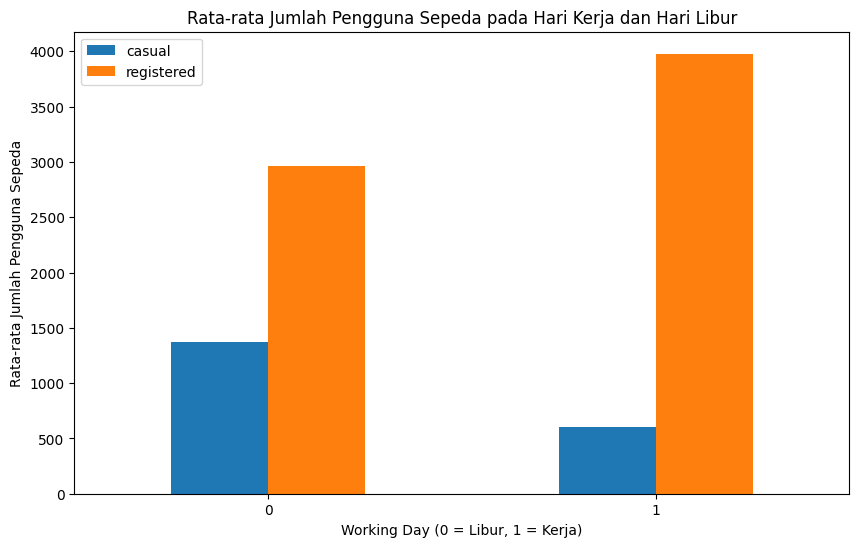

Rata-rata jumlah pengguna sepeda berdasarkan kondisi cuaca:
               casual  registered
weathersit                       
1           40.545431  164.323841
2           29.595290  145.570202
3           16.055673   95.523608
4            2.666667   71.666667


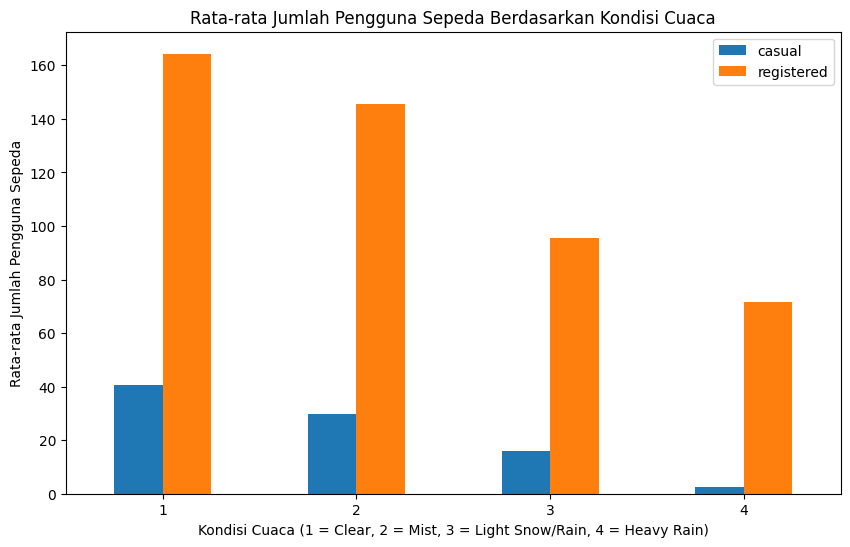

In [ ]:
# Pertanyaan 1: Apakah ada perbedaan jumlah pengguna sepeda (casual dan registered) pada hari kerja?

# Menghitung rata-rata jumlah pengguna sepeda (casual dan registered) pada hari kerja dan hari libur
workingday_avg = day_df.groupby('workingday')[['casual', 'registered']].mean()
print("Rata-rata jumlah pengguna sepeda pada hari kerja dan hari libur:")
print(workingday_avg)

# Visualisasi perbedaan jumlah pengguna sepeda pada hari kerja dan hari libur
workingday_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Jumlah Pengguna Sepeda pada Hari Kerja dan Hari Libur')
plt.xlabel('Working Day (0 = Libur, 1 = Kerja)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(rotation=0)
plt.show()

# Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna sepeda (casual dan registered) setiap jamnya?

# Menghitung rata-rata jumlah pengguna sepeda (casual dan registered) berdasarkan kondisi cuaca
weather_avg = hour_df.groupby('weathersit')[['casual', 'registered']].mean()
print("Rata-rata jumlah pengguna sepeda berdasarkan kondisi cuaca:")
print(weather_avg)

# Visualisasi pengaruh kondisi cuaca terhadap jumlah pengguna sepeda
weather_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Jumlah Pengguna Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1 = Clear, 2 = Mist, 3 = Light Snow/Rain, 4 = Heavy Rain)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

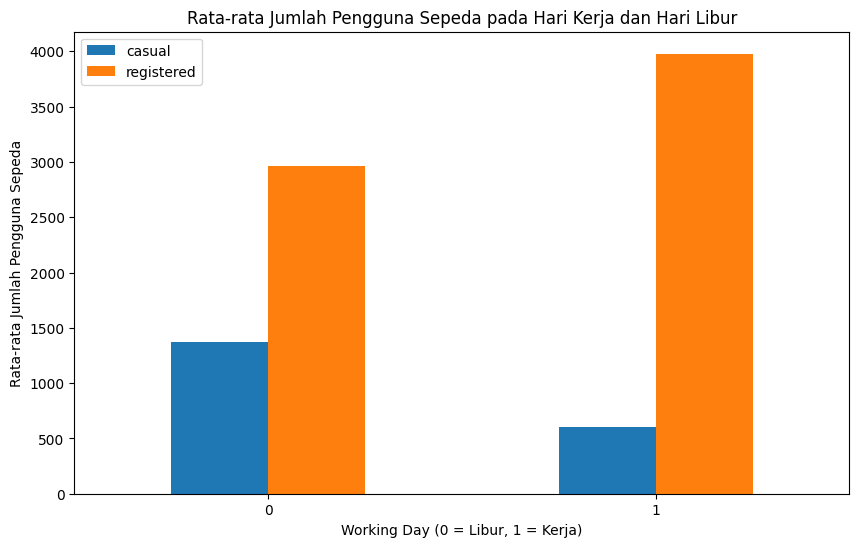

In [ ]:
# Visualisasi perbedaan jumlah pengguna sepeda pada hari kerja dan hari libur
workingday_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Jumlah Pengguna Sepeda pada Hari Kerja dan Hari Libur')
plt.xlabel('Working Day (0 = Libur, 1 = Kerja)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 2:

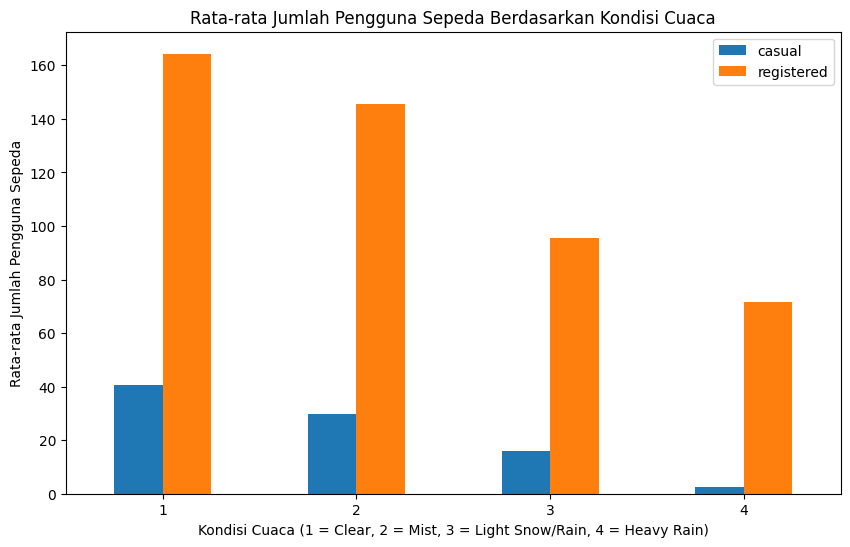

In [ ]:
# Visualisasi pengaruh kondisi cuaca terhadap jumlah pengguna sepeda
weather_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Jumlah Pengguna Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1 = Clear, 2 = Mist, 3 = Light Snow/Rain, 4 = Heavy Rain)')
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

Korelasi antara suhu, kelembaban, dan jumlah pengguna sepeda:
                temp       hum    casual  registered
temp        1.000000 -0.069881  0.459616    0.335361
hum        -0.069881  1.000000 -0.347028   -0.273933
casual      0.459616 -0.347028  1.000000    0.506618
registered  0.335361 -0.273933  0.506618    1.000000


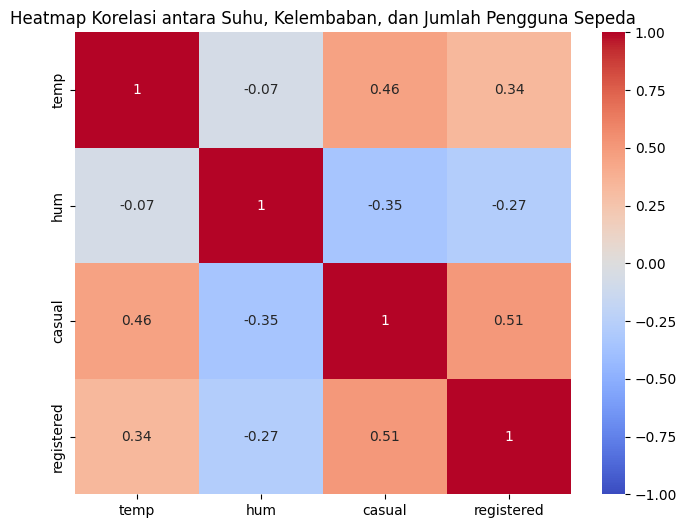

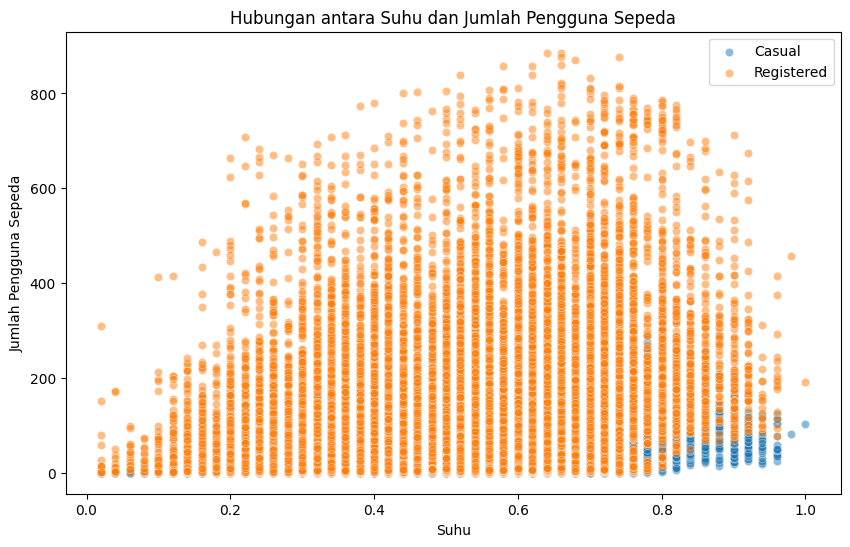

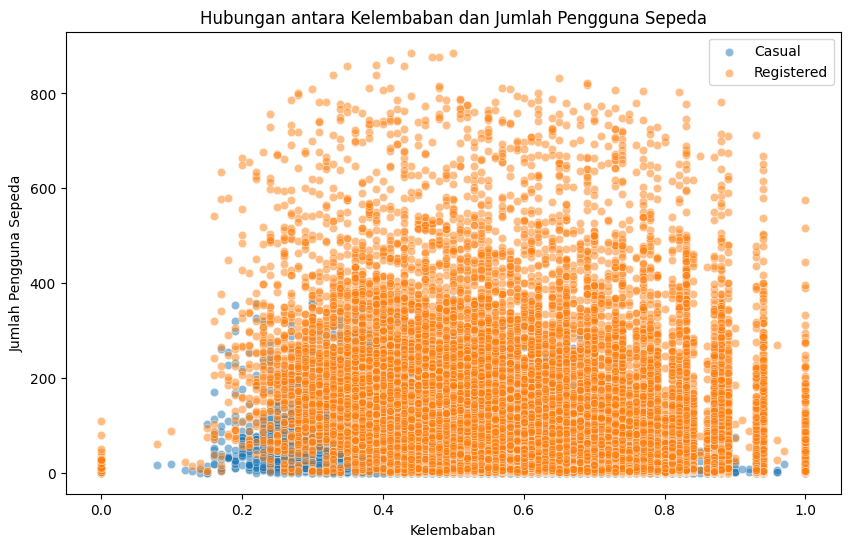

In [ ]:
# Menghitung korelasi antara suhu, kelembaban, dan jumlah pengguna sepeda (casual dan registered)
correlation = hour_df[['temp', 'hum', 'casual', 'registered']].corr()
print("Korelasi antara suhu, kelembaban, dan jumlah pengguna sepeda:")
print(correlation)

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara Suhu, Kelembaban, dan Jumlah Pengguna Sepeda')
plt.show()

# Visualisasi scatter plot antara suhu dan jumlah pengguna sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='casual', data=hour_df, label='Casual', alpha=0.5)
sns.scatterplot(x='temp', y='registered', data=hour_df, label='Registered', alpha=0.5)
plt.title('Hubungan antara Suhu dan Jumlah Pengguna Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.legend()
plt.show()

# Visualisasi scatter plot antara kelembaban dan jumlah pengguna sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='casual', data=hour_df, label='Casual', alpha=0.5)
sns.scatterplot(x='hum', y='registered', data=hour_df, label='Registered', alpha=0.5)
plt.title('Hubungan antara Kelembaban dan Jumlah Pengguna Sepeda')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.legend()
plt.show()

## Conclusion

### Kesimpulan Pertanyaan 1:
Berdasarkan analisis yang dilakukan, terdapat perbedaan yang signifikan dalam jumlah pengguna sepeda (casual dan registered) pada hari kerja dan hari libur. Rata-rata jumlah pengguna sepeda casual lebih tinggi pada hari libur dibandingkan hari kerja. Sebaliknya, rata-rata jumlah pengguna sepeda registered lebih tinggi pada hari kerja dibandingkan hari libur. Hal ini menunjukkan bahwa pengguna sepeda casual cenderung lebih banyak bersepeda pada hari libur, sementara pengguna sepeda registered lebih banyak bersepeda pada hari kerja.

### Kesimpulan Pertanyaan 2:
Dari analisis pengaruh kondisi cuaca terhadap jumlah pengguna sepeda (casual dan registered), terlihat bahwa kondisi cuaca yang lebih baik (clear atau mist) cenderung meningkatkan jumlah pengguna sepeda baik casual maupun registered. Sebaliknya, kondisi cuaca yang buruk (light snow/rain atau heavy rain) cenderung menurunkan jumlah pengguna sepeda. Ini menunjukkan bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah pengguna sepeda, di mana cuaca yang lebih baik mendorong lebih banyak orang untuk bersepeda.

- Conclution pertanyaan 1
- Conclution pertanyaan 2